In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict,Annotated
from dotenv import load_dotenv
import os
from pydantic import BaseModel, Field
import operator
from typing import Literal

In [2]:
class QuadreticEquationInput(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float 
    result: str

In [4]:
def Create_Equation(state: QuadreticEquationInput):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    state['equation'] = equation
    return state

In [5]:
def calculate_discriminant(state: QuadreticEquationInput) -> dict:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c
    return {
        "discriminant": discriminant
    }

In [15]:
def real_roots(state : QuadreticEquationInput) -> dict:
    a = state['a']
    b = state['b']
    c = state['c']
    D = state['discriminant']
    root1 = (-b + D**0.5) / (2*a)
    root2 = (-b - D**0.5) / (2*a)
    return {
        "result": f"The equation has two real roots: {root1} and {root2}"
    }

In [16]:
def repeated_roots(state : QuadreticEquationInput) -> dict:
    a = state['a']
    b = state['b']
    D = state['discriminant']
    root = -b / (2*a)
    return {
        "result": f"The equation has one repeated real root: {root}"
    }

In [30]:
def complex_roots(state : QuadreticEquationInput) -> dict:
    return {
        "result": f"The equation has two complex roots: No real solutions exist."
    }

In [31]:
def check_condition(state: QuadreticEquationInput) -> Literal["real_roots", "repeated_roots", "complex_roots"]:
    D = state['discriminant']
    if D > 0:
        condition = "real_roots"
    elif D == 0:
        condition = "repeated_roots"
    else:
        condition = "complex_roots"
    return condition

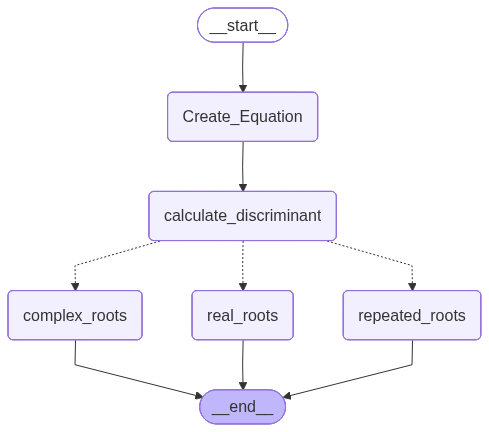

In [32]:
graph = StateGraph(QuadreticEquationInput)
graph.add_node("Create_Equation",Create_Equation)
graph.add_node("calculate_discriminant",calculate_discriminant) 
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots)
graph.add_node("complex_roots",complex_roots)

graph.add_edge(START,"Create_Equation")
graph.add_edge("Create_Equation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_condition)
graph.add_edge("real_roots",END)
graph.add_edge("repeated_roots",END)
graph.add_edge("complex_roots",END)
   

workflow = graph.compile()
workflow

In [33]:
initial_state: QuadreticEquationInput = {
    "a": 28,
    "b": -1,
    "c": 2,
    "equation": "",
    "discriminant": 0.0,
    "result": ""
}

final_state = workflow.invoke(initial_state)
final_state

{'a': 28,
 'b': -1,
 'c': 2,
 'equation': '28x^2 + -1x + 2 = 0',
 'discriminant': -223,
 'result': 'The equation has two complex roots: No real solutions exist.'}